In [17]:
import numpy as np
import matplotlib.pyplot as plt
import ast
import json

In [60]:
def load_data(file_path):
    data = []
    with open(file_path, "r") as file:
        for line in file:
            data.append(json.loads(line.strip()))
    return data

def analyze_stiar_results(data):
    '''
    data: list of dictionaries
    '''
    success_count = 0
    total_episodes = len(data)
    total_climb_steps = 0
    sutck_episodes = []
    no_stiar_episodes = []
    for result in data:
        if result["climb_success"]:
            success_count += 1
            total_climb_steps += result["climbing_step"]
        if not result["climb_success"] and result["climbing_step"] > 0:
            sutck_episodes.append(result["episode"])
        if result["climbing_step"] == 0:
            no_stiar_episodes.append(result["episode"])
    
    avg_successful_climb_steps = total_climb_steps / success_count
    success_rate = success_count / total_episodes
    
    print("Total episodes: ", total_episodes)
    print("Success count: ", success_count)
    print("Average successful climb steps: ", avg_successful_climb_steps)
    print("Num stuck episodes: ", len(sutck_episodes))
    print("Num no stair episodes: ", len(no_stiar_episodes))
    print("\n")
    
    return total_episodes, success_count, avg_successful_climb_steps, sutck_episodes, no_stiar_episodes

In [66]:
upstair_path = "/workspace_sdc/tiamat_ws/VLN-Game/dump/logs/upstair_2_per_scene_v2-dino/all_info.log"
downstair_path = "/workspace_sdc/tiamat_ws/VLN-Game/dump/logs/downstair_2_per_scene_v2-dino/all_info.log"
mp3d_upstair_path = "/workspace_sdc/tiamat_ws/VLN-Game/dump/logs/mp3d_upstair_2_per_scene_v2-dino/all_info.log"
mp3d_downstair_path = "/workspace_sdc/tiamat_ws/VLN-Game/dump/logs/mp3d_downstair_2_per_scene_v2-dino/all_info.log"
upstair_stats = load_data(upstair_path)
downstair_stats = load_data(downstair_path)
mp3d_upstair_stats = load_data(mp3d_upstair_path)
mp3d_downstair_stats = load_data(mp3d_downstair_path)

hm3d_up = analyze_stiar_results(upstair_stats)
hm3d_down = analyze_stiar_results(downstair_stats)
mp3d_up = analyze_stiar_results(mp3d_upstair_stats)
mp3d_down = analyze_stiar_results(mp3d_downstair_stats)

Total episodes:  36
Success count:  27
Average successful climb steps:  78.55555555555556
Num stuck episodes:  3
Num no stair episodes:  6


Total episodes:  22
Success count:  15
Average successful climb steps:  66.73333333333333
Num stuck episodes:  5
Num no stair episodes:  2


Total episodes:  15
Success count:  9
Average successful climb steps:  106.11111111111111
Num stuck episodes:  5
Num no stair episodes:  1


Total episodes:  16
Success count:  5
Average successful climb steps:  79.2
Num stuck episodes:  10
Num no stair episodes:  1




In [75]:
print(mp3d_down[3])
print(mp3d_down[4])

['oLBMNvg9in8.glb_149', 'EU6Fwq7SyZv.glb_30', 'EU6Fwq7SyZv.glb_29', 'EU6Fwq7SyZv.glb_31', 'X7HyMhZNoso.glb_190', 'X7HyMhZNoso.glb_168', '8194nk5LbLH.glb_121', '2azQ1b91cZZ.glb_37', 'TbHJrupSAjP.glb_80', 'TbHJrupSAjP.glb_84']
['8194nk5LbLH.glb_67']


[(0.5, 0.0, 1.0, 1.0), (0.0019607843137254832, 0.7092813076058534, 0.9232891061054893, 1.0), (0.503921568627451, 0.9999810273487268, 0.7049255469061472, 1.0), (1.0, 0.7005430375932911, 0.37841105004231035, 1.0)]


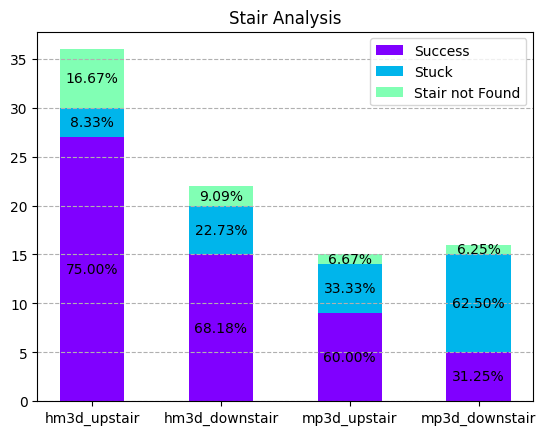

In [72]:
weight_counts = {
    "Success": np.array([hm3d_up[1], hm3d_down[1], mp3d_up[1], mp3d_down[1]]),
    "Stuck": np.array([len(hm3d_up[3]), len(hm3d_down[3]), len(mp3d_up[3]), len(mp3d_down[3])]),
    "Stair not Found": np.array([len(hm3d_up[4]), len(hm3d_down[4]), len(mp3d_up[4]), len(mp3d_down[4])])
}
cases = (
    "hm3d_upstair",
    "hm3d_downstair",
    "mp3d_upstair",
    "mp3d_downstair"
)
total_episodes = ([hm3d_up[0], hm3d_down[0], mp3d_up[0], mp3d_down[0]])
width = 0.5
cmap = plt.cm.rainbow  # Get the 'rainbow' colormap
colors = [cmap(i / len(cases)) for i in range(len(cases))]  # Generate rainbow colors
print(colors)

fig, ax = plt.subplots()
bottom = np.zeros(len(cases))

for i, item in enumerate(weight_counts.items()):
    label, weight_count = item
    p = ax.bar(cases, weight_count, width, label=label, bottom=bottom, color=colors[i])
    bottom += weight_count
    labels = [f"{weight_count[j]/total_episodes[j]*100:0.2f}%" for j in range(len(weight_count))]
    ax.bar_label(p, label_type='center', labels=labels)
    # ax.bar_label(p, label_type='center', labels=[f"{weight_count[0]/total_up:0.2f}", f"{weight_count[1]/total_down:0.2f}"])

ax.legend(loc="upper right")
ax.set_title("Stair Analysis")
plt.grid(axis='y', linestyle='--', alpha=1.0)

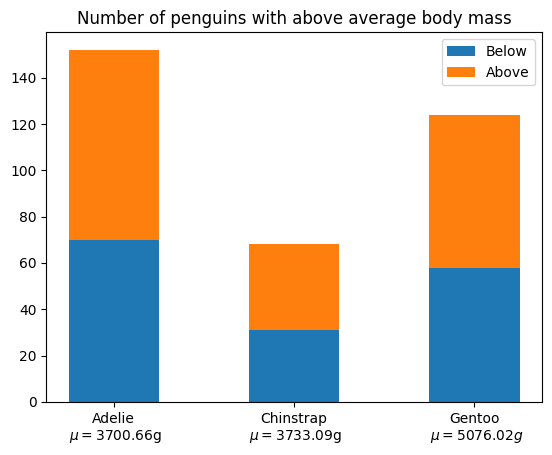

In [47]:
species = (
    "Adelie\n $\\mu=$3700.66g",
    "Chinstrap\n $\\mu=$3733.09g",
    "Gentoo\n $\\mu=5076.02g$",
)
weight_counts = {
    "Below": np.array([70, 31, 58]),
    "Above": np.array([82, 37, 66]),
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(3)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(species, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Number of penguins with above average body mass")
ax.legend(loc="upper right")

plt.show()